In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

In [ ]:
# Extract the features (assuming they are numeric)
data = df.iloc[:, :-1].values

In [ ]:
# Compute the mean and standard deviation for each feature
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [ ]:
# Standardize the features
normalized_features = (data - means) / stds

print("Standardized Data:")
print(normalized_features)


In [ ]:
# Step 2: Covariance Matrix
cov_matrix = np.cov(normalized_features.T)

In [ ]:
# Step 3: Eigen Decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
# Step 4: Projection
# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

In [ ]:
# Choose the number of components (let's say 2)
num_components = 2
selected_eigen_vectors = sorted_eigen_vectors[:, :num_components]

In [ ]:
# Project the original data onto the selected eigenvectors
projected_data = np.dot(normalized_features, selected_eigen_vectors)

print("Projected Data:")
print(projected_data)

In [ ]:
# Calculate explained variance ratio
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print("Explained Variance Ratio:", explained_variance_ratio)

In [ ]:
# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

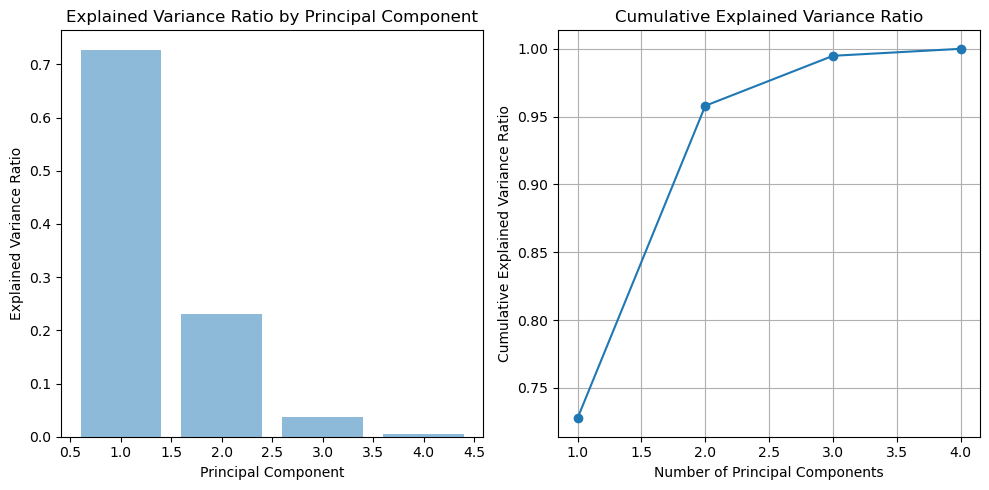

In [78]:
# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

# Plot cumulative explained variance ratio
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

feature = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:,feature]
y = df.loc[:,'target']

y.unique()

x = StandardScaler().fit_transform(x)         
print(x)        

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
pca = PCA(n_components=3)
pct = pca.fit_transform(x)
principal_df = pd.DataFrame(pct, columns=['pc1', 'pc2', 'pc3'])
finaldf = pd.concat([principal_df, df[['target']]], axis=1)
print(finaldf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['m', 'c', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15) 
ax.set_title('3 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['m', 'c', 'y']

for target, color in zip(targets, colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1'],
               finaldf.loc[indicesToKeep, 'pc2'],
               finaldf.loc[indicesToKeep, 'pc3'],  # Add PC3 for the z-axis
               c=color,
               s=50)

ax.legend(targets)
ax.grid()

ax.set_zlim([finaldf['pc3'].min(), finaldf['pc3'].max()])

ax.view_init(elev=10
             , azim=10) 


plt.show()
